In [21]:
import random
import time
import matplotlib.pyplot as plt
import math     #math for log2

maxArrSize = 10000
sValue = 25
randomNumRange = 5000

mergeSortKeyComparision = 0
insertionSortKeyComparision = 0
hybridSortKeyComparision = 0

In [2]:
def merge_sort(arr):
    global mergeSortKeyComparision  # Declare the global variable
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]
    
    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)
    
    return merge(left_half, right_half)

def merge(left, right):
    global mergeSortKeyComparision  # Declare the global variable
    merged = []
    left_index = 0
    right_index = 0
    
    while left_index < len(left) and right_index < len(right):
        mergeSortKeyComparision += 1  # Increment comparison count
        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    
    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1
    
    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1
    
    return merged

In [3]:
def insertionSort(arr):
    global insertionSortKeyComparision  # Declare the global variable
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            insertionSortKeyComparision += 1  # Increment comparison count
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [4]:
def hybridSort(arr, s):
    if len(arr) <= s:
        return hybridInsertionSort(arr)
    
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]
    
    left_half = hybridSort(left_half, s)
    right_half = hybridSort(right_half, s)
    
    return hybridMergeSort(left_half, right_half)

def hybridInsertionSort(arr):
    global hybridSortKeyComparision  # Declare the global variable
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            hybridSortKeyComparision += 1  # Increment comparison count
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybridMergeSort(left, right):
    global hybridSortKeyComparision  # Declare the global variable
    merged = []
    left_index = 0
    right_index = 0
    
    while left_index < len(left) and right_index < len(right):
        hybridSortKeyComparision += 1  # Increment comparison count
        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    
    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1
    
    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1
    
    return merged

In [5]:
## Part B generating input data
## Size referes to the max size of array, n refers to the range of numbers, and duplicate refers to whether the array can have duplicates
def initialize_array(size, n, duplicate, seed = None):
    if seed is not None:
        random.seed(seed)
    
    if(duplicate):
        return [random.randint(1, n) for _ in range(size)]
    else:
        return random.sample(range(1, size+1), size)


In [23]:
## Part C.i
def fixedS_VS_arraySize(sValue,maxRange,pwr10=7,dupe=True):
    global hybridSortKeyComparision
    array_sizes = []
    key_comparisons = []
    times_taken = []
    Theory_key_comparisons = []
    
    def theoretical_key_comparisons(n,S):
        return n * S + n * math.log(n/S, 2)
        

    for i in range(3,pwr10+1):
        hybridSortKeyComparision = 0
        if(dupe):
            arr = initialize_array(10**i,maxRange,dupe)
        else:
            arr = initialize_array(10**i,maxRange,dupe)
        start = time.time()
        hybridSort(arr,sValue)
        end = time.time()
        print("ArraySize: ",10**i," Key Comparisons: ",hybridSortKeyComparision, " Time Taken: ",end-start)
        array_sizes.append(10**i)
        key_comparisons.append(hybridSortKeyComparision)
        times_taken.append(end - start)
        Theory_key_comparisons.append(theoretical_key_comparisons(10**i, sValue))

    
    # Visualization
    plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(array_sizes, key_comparisons, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Array Size')
    plt.ylabel('Key Comparisons')
    plt.title(f'Empirical Key Comparisons')

    plt.subplot(1, 2, 2)
    plt.plot(array_sizes, Theory_key_comparisons, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Array Size')
    plt.ylabel('Key Comparisons')
    plt.title(f'Theoretical Key Comparisons')

    '''
    plt.subplot(1, 2, 2)
    plt.plot(array_sizes, times_taken, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Array Size')
    plt.ylabel('Time Taken (seconds)')
    plt.title(f'Hybrid Sort Time Taken for S = {sValue}')
    '''
    plt.suptitle(f'Hybrid sort for S = {sValue}') 
    plt.show()

In [19]:
def fixedArraySize_VS_sValue(startingS,endingS,stepS,size,maxRandArr,dupe=True):
    global hybridSortKeyComparision
    s_values = []
    key_comparisons = []
    times_taken = []
    
    #if(dupe):
    #        arr = initialize_array(size,maxRandArr,dupe) ##Enable this to fix the array values to allow comparison of S values' impact only. In theory, should make merging always the same
    #else:
    #        arr = initialize_array(size,maxRandArr,dupe)

    #for i in range(startingS,endingS+1,stepS):
    #    hybridSortKeyComparision = 0
    #    ##if(dupe):
    #    ##    arr = initialize_array(size,maxRandArr,dupe) ##what if we move this out of the for loop? we fix the N and n values by doing so we may have a better comparison
    #    ##else:
    #    ##    arr = initialize_array(size,maxRandArr,dupe)
    #    if (i==0): continue
    #    else:
    #        start = time.time()
    #        hybridSort(arr,i)
    #        end = time.time()
    #        print("S Value: ",i," Key Comparisons: ",hybridSortKeyComparision, " Time Taken: ",end-start)
    #        s_values.append(i)
    #        key_comparisons.append(hybridSortKeyComparision)
    #        times_taken.append(end - start)
    
    # Visualization
    #plt.figure()
    
    #plt.subplot(1, 2, 1)
    #plt.plot(s_values, key_comparisons, marker='o')
    #plt.yscale('log')
    #plt.xlabel('S Value')
    #plt.ylabel('Key Comparisons')
    #plt.title(f'Hybrid Sort Key Comparisons for Array Size = {size}')
    
    #plt.subplot(1, 2, 2)
    #plt.plot(s_values, times_taken, marker='o')
    #plt.xlabel('S Value')
    #plt.ylabel('Time Taken (seconds)')
    #plt.title(f'Hybrid Sort Time Taken for Array Size = {size}')
    
    #plt.tight_layout()
    #plt.show()
# Visualization attempt

    #plt.figure()
    
    #plt.subplot(1, 2, 1)
    #plt.plot(s_values, key_comparisons, marker='o')
    #plt.yscale('log')
    #plt.xlabel('S Value')
    #plt.ylabel('Key Comparisons')
    #plt.title(f'Hybrid Sort Key Comparisons for Array Size = {size}')

    #plt.subplot(1, 2, 2)
    #plt.plot(s_values, times_taken, marker='o')
    #plt.xlabel('S Value')
    #plt.ylabel('Time Taken (seconds)')
    #plt.title(f'Hybrid Sort Time Taken for Array Size = {size}')
    #plt.tight_layout()
    #plt.show()

    
    #Visualization for best and worst cases
    Bestcase=[]
    Worstcase=[]
    Sv=[]
    for i in range(startingS,endingS+1,1):
        if (i==0): continue
        else:
            Sv.append(i)
            log = math.log2(size/i)
            BestcaseformulaforstaticS = size 
            BestcaseformulaforstaticS += size*log ##formula for best case i = S
            Bestcase.append(BestcaseformulaforstaticS)
            WorstcaseformulaforstaticS = size*i 
            WorstcaseformulaforstaticS += size*log ##formula for worst case i = S
            Worstcase.append(WorstcaseformulaforstaticS)


    plt.subplot(1, 2, 1)
    plt.plot(Sv, Bestcase, marker='o')
    plt.yscale('log')
    plt.xlabel('S Value')
    plt.ylabel('Best case Key Comparisons')
    plt.title(f'Best case Key Comparisons for Array Size = {size}')

    plt.subplot(1, 2, 2)
    plt.plot(Sv, Worstcase, marker='o')
    plt.yscale('log')
    plt.xlabel('S Value')
    plt.ylabel('Worst case Key Comparisons')
    plt.title(f'Worst case Key Comparisons for Array Size = {size}')
    
    plt.tight_layout()
    plt.show()

In [8]:
## Part C.iii
def differentSValuesVSDifferentArraySize(startingS,endingS,stepS,arrMaxRange,pwr10=5,dupe=True, trials = 10):
    global hybridSortKeyComparision
    
    optimal_S = startingS
    min_avg_comparisons = float('inf')  # Initialize minimum comparisons to a high value
    
    for i in range(startingS,endingS+1,stepS):
        total_comparisons = 0
        total_time = 0
        num_sizes = 0  # Track the number of array sizes
        
        # Iterate through array sizes
        for j in range(3,pwr10+1):
            avg_comparisons = 0
            avg_time = 0
            
            # Perform multiple trials and average the results
            for k in range(trials):
                hybridSortKeyComparision = 0
                
                # Set a fixed seed that depends on both S and array size
                seed = 42 + i + j  # Ensures a different seed for each S and array size
                #arr = initialize_array(10**j, arrMaxRange, dupe, seed=seed)
                
                if(dupe):
                    arr = initialize_array(10**j,arrMaxRange,dupe, seed=seed)
                else:
                    arr = initialize_array(10**j,arrMaxRange,dupe, seed=seed)
                
                start = time.time()
                hybridSort(arr,i)
                end = time.time()
                
                avg_comparisons += hybridSortKeyComparision
                avg_time += (end - start)
        
            # Calculate average comparisons and time taken
            avg_comparisons /= trials
            avg_time /= trials
            
            # Print the intermediate results
            print("S Value: ",i," ArraySize: ",10**j," Avg Key Comparisons: ",avg_comparisons, " Avg Time Taken: ",avg_time)
            
            # Accumulate the total comparisons and time across array sizes for this S
            total_comparisons += avg_comparisons
            total_time += avg_time
            num_sizes += 1  # Increment the number of array sizes tested
        
        # Calculate the average comparisons across all array sizes for this S
        avg_comparisons_overall = total_comparisons / num_sizes
        avg_time_overall = total_time / num_sizes
            
        print(f"Avg Comparisons for S = {i}: {avg_comparisons_overall}, Avg Time: {avg_time_overall:.4f} seconds\n")
            
        # Check if the current S value gives the least average comparisons
        if avg_comparisons_overall < min_avg_comparisons:
            min_avg_comparisons = avg_comparisons_overall
            optimal_S = i
        
    
    
    print(f"Optimal S Value: {optimal_S} with {min_avg_comparisons} key comparisons\n")
    return optimal_S

In [17]:
## Part D
def hybridVsMerge(size, maxRange, sValue, dupe):
    global mergeSortKeyComparision, hybridSortKeyComparision
    
    hybridSortKeyComparision = 0
    mergeSortKeyComparision = 0
    
    if(dupe):
        arr = initialize_array(size,maxRange,dupe)
    else:
        arr = initialize_array(size,maxRange,dupe)
    
    # Hybrid Sort
    start = time.time()
    hybridSort(arr,sValue)
    end = time.time()
    print("Hybrid Sort Key Comparisons: ",hybridSortKeyComparision, " Time Taken: ",end-start)
    hybrid_time = time.time() - start
    hybrid_key_comparisons = hybridSortKeyComparision
    
    # Merge Sort
    start = time.time()
    merge_sort(arr)
    end = time.time()
    print("Merge Sort Key Comparisons: ",mergeSortKeyComparision, " Time Taken: ", end-start)
    merge_time = time.time() - start
    merge_key_comparisons = mergeSortKeyComparision
    
    # Visualization
    algorithms = ['Hybrid Sort', 'Merge Sort']
    key_comparisons = [hybrid_key_comparisons, merge_key_comparisons]
    times_taken = [hybrid_time, merge_time]
    
    plt.figure()
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(algorithms, key_comparisons, color=['blue', 'orange'])
    plt.yscale('log')
    plt.ylabel('Key Comparisons')
    plt.title(f'Comparison of Hybrid and Merge Sort (Array Size = {size})')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
    
    plt.subplot(1, 2, 2)
    bars = plt.bar(algorithms, times_taken, color=['blue', 'orange'])
    plt.ylabel('Time Taken (seconds)')
    plt.title(f'Comparison of Hybrid and Merge Sort (Array Size = {size})')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')
    
    
    plt.tight_layout()
    plt.show()


ArraySize:  1000  Key Comparisons:  8504  Time Taken:  0.0013620853424072266
ArraySize:  10000  Key Comparisons:  120105  Time Taken:  0.03138589859008789
ArraySize:  100000  Key Comparisons:  1497831  Time Taken:  0.22829890251159668
ArraySize:  1000000  Key Comparisons:  18422240  Time Taken:  2.768012046813965
ArraySize:  10000000  Key Comparisons:  219426406  Time Taken:  34.210734128952026


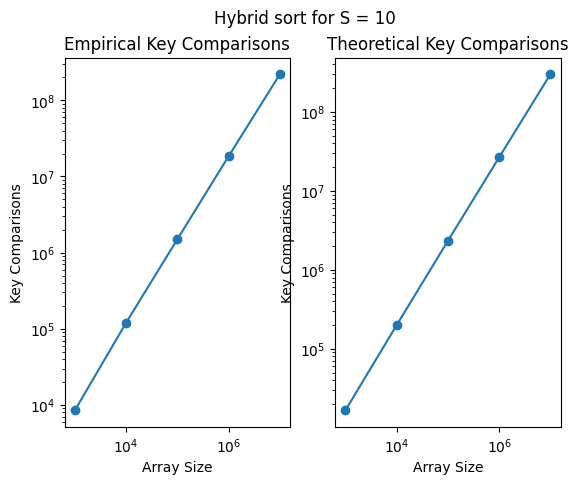

In [24]:
## To run part C.i
fixedS_VS_arraySize(10,randomNumRange,7,True)

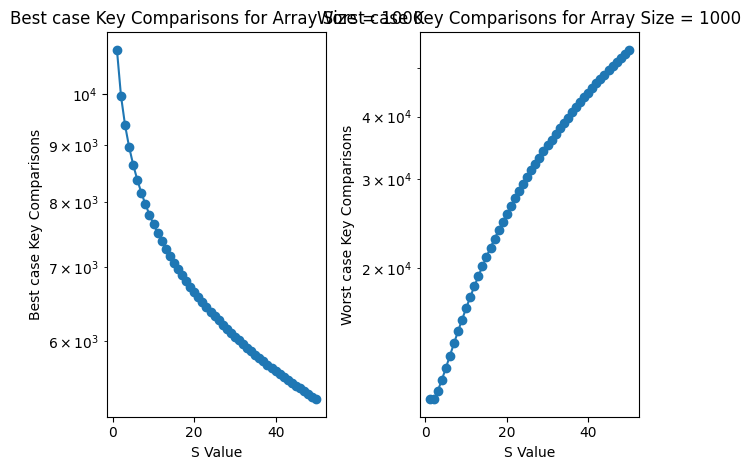

In [22]:
## To run part C.ii
fixedArraySize_VS_sValue(1,50,1,1000,50,True)

In [12]:
## To run part C.iii
differentSValuesVSDifferentArraySize(1,10,1,randomNumRange,7,True, 10)

S Value:  1  ArraySize:  1000  Avg Key Comparisons:  8674.0  Avg Time Taken:  0.0020079851150512696
S Value:  1  ArraySize:  10000  Avg Key Comparisons:  120524.0  Avg Time Taken:  0.023265528678894042
S Value:  1  ArraySize:  100000  Avg Key Comparisons:  1536230.0  Avg Time Taken:  0.27941510677337644
S Value:  1  ArraySize:  1000000  Avg Key Comparisons:  18673701.0  Avg Time Taken:  3.2625513315200805
S Value:  1  ArraySize:  10000000  Avg Key Comparisons:  220094441.0  Avg Time Taken:  40.6547134399414
Avg Comparisons for S = 1: 48086714.0, Avg Time: 8.8444 seconds

S Value:  2  ArraySize:  1000  Avg Key Comparisons:  8464.0  Avg Time Taken:  0.0015350341796875
S Value:  2  ArraySize:  10000  Avg Key Comparisons:  118317.0  Avg Time Taken:  0.02094883918762207
S Value:  2  ArraySize:  100000  Avg Key Comparisons:  1519099.0  Avg Time Taken:  0.2602895021438599
S Value:  2  ArraySize:  1000000  Avg Key Comparisons:  18435702.0  Avg Time Taken:  3.041568636894226
S Value:  2  ArrayS

6

Hybrid Sort Key Comparisons:  215786472  Time Taken:  37.13322305679321
Merge Sort Key Comparisons:  220093147  Time Taken:  39.69431400299072


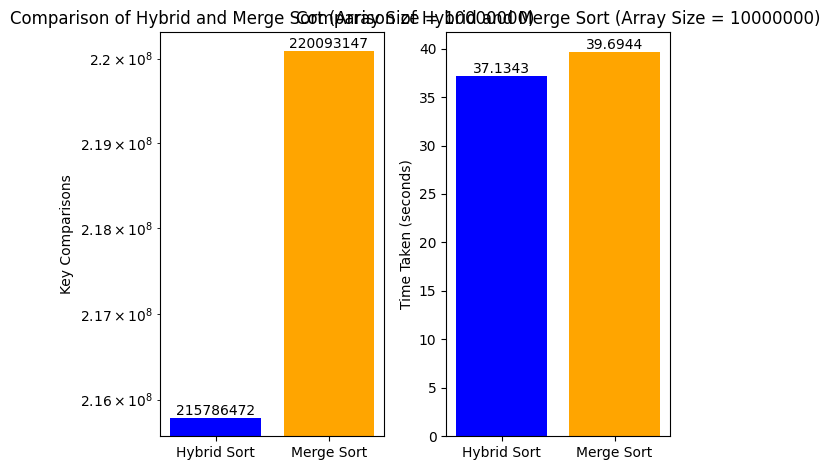

In [18]:
## To run part D
hybridVsMerge(10000000, randomNumRange, 6, True)